In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import sys
sys.path.append("/content/drive/MyDrive/git_workspace/mlconservation_code/src")

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from dynamical_system import XYModelSystem
from time_integrator import ForwardEulerIntegrator, RK4Integrator
%matplotlib inline


## Generate trajectories for XY Model
Run the model with 4 spins to generate array with positions.

In [13]:
#np.random.seed(2145127)
dim = 4
dynamical_system = XYModelSystem(dim)
dt = 0.01
time_integrator = RK4Integrator(dynamical_system,dt)
q = np.random.uniform(low=-np.pi,high=+np.pi,size=dim)
qdot = np.random.normal(size=dim)

T = 16.0
nsteps = int(T/dt)
q_all = np.zeros((dim,nsteps+1))
qdot_all = np.zeros((dim,nsteps+1))
t = np.zeros(nsteps+1)
sum_qdot = np.zeros(nsteps+1)
time_integrator.set_state(q,qdot)
for j in range(nsteps+1):
    q_all[:,j] = time_integrator.q[:]
    qdot_all[:,j] = time_integrator.qdot[:]
    sum_qdot[j] = np.sum(time_integrator.qdot[:])
    t[j] = j*dt
    time_integrator.integrate(1)

# Map to interval [-pi,+pi]
def map_to_interval(x):
    return x - 2.*np.pi*((x+np.pi)//(2.*np.pi))

q_all = np.vectorize(map_to_interval)(q_all)


## Plot positions as a function of time

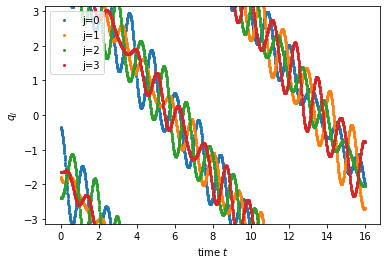

In [14]:

for j in range(dim):
    plt.plot(t,q_all[j,:],linewidth=0,marker="o",markersize=2,label=f"j={j:d}")
ax = plt.gca()
ax.set_xlabel("time $t$")
ax.set_ylabel("$q_j$")
ax.set_ylim(-np.pi,+np.pi)
plt.legend(loc="upper left")
plt.show()

## Plot sum of velocities
Note that this sum should be constant since the Lagrangian is invariant under global rotations

$$
\mathcal{L}(\theta_0+\phi,\theta_1+\phi,\dots,\theta_{d-1}+\phi) = \mathcal{L}(\theta_0,\theta_1,\dots,\theta_{d-1})
$$

Text(0, 0.5, '$\\dot{Q} = \\sum_{j=0}^{d-1}\\dot{q}_j$')

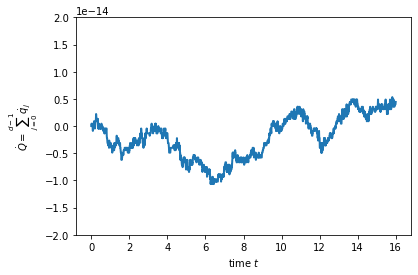

In [15]:
ax = plt.gca()
ax.set_ylim(-2.E-14,+2.E-14)
plt.plot(t,sum_qdot-sum_qdot[0],linewidth=2)
ax.set_xlabel("time $t$")
ax.set_ylabel(r"$\dot{Q} = \sum_{j=0}^{d-1}\dot{q}_j$")